In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
import time


In [2]:
# Lendo o arquivo base e criando o dataframe
df = pd.read_csv ('APNS_6.csv', delimiter=";")

# Visualizando as informações do dataframe
print (df.shape)
df.head()

(1420, 12)


,GRANDE_REG,COD_UF,SIGLA_UF,COD,NOME,TIPO,COD_CAT_ASSOC,CAT_ASSOC,COD_MUN,NOME_MUN,LEG,DATA
0,Centro-Oeste,53,DF,5301,Região Integrada de Desenvolvimento do Distrit...,RIDE,530101,NÃO TEM,5300108,BRASÍLIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,19/02/1998
1,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200100,ABADIÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,19/02/1998
2,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200175,ÁGUA FRIA DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,19/02/1998
3,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200258,ÁGUAS LINDAS DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,19/02/1998
4,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200308,ALEXÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,19/02/1998


In [3]:
#  Verificando as colunas para realizar a limpeza 
# dos dados que não seriam utilizados

print(df.columns)
df.info()

Index(['GRANDE_REG', 'COD_UF', 'SIGLA_UF', 'COD', 'NOME', 'TIPO',
       'COD_CAT_ASSOC', 'CAT_ASSOC', 'COD_MUN', 'NOME_MUN', 'LEG', 'DATA'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GRANDE_REG     1420 non-null   object
 1   COD_UF         1420 non-null   int64 
 2   SIGLA_UF       1420 non-null   object
 3   COD            1420 non-null   int64 
 4   NOME           1420 non-null   object
 5   TIPO           1420 non-null   object
 6   COD_CAT_ASSOC  1420 non-null   object
 7   CAT_ASSOC      1420 non-null   object
 8   COD_MUN        1420 non-null   int64 
 9   NOME_MUN       1420 non-null   object
 10  LEG            1420 non-null   object
 11  DATA           1420 non-null   object
dtypes: int64(3), object(9)
memory usage: 133.2+ KB


In [4]:
#  Removendo colunas não desejadas para a ánalise do arquivo.
data = df.drop(['SIGLA_UF','NOME','LEG','COD_CAT_ASSOC','CAT_ASSOC','NOME_MUN','DATA', 'GRANDE_REG'], axis=1)
print(data.columns)
print("quantidade de colunas:", len(data.columns))

Index(['COD_UF', 'COD', 'TIPO', 'COD_MUN'], dtype='object')
quantidade de colunas: 4


In [5]:
# Verificando os dados únicos da coluna TIPO
print(data['TIPO'].unique())
print(10*"----")
print(data['TIPO'].value_counts())


['RIDE' 'RM' 'AGLO']
----------------------------------------
RM      1290
AGLO      74
RIDE      56
Name: TIPO, dtype: int64


In [6]:
# Definindo valores de X e y
X = data.loc[: , data.columns != 'TIPO'].values
y = data['TIPO'].values

len(data.columns)

4

In [7]:
#  Usando label encoder para discretizar os dados de y

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

scale_obj = StandardScaler()
X = scale_obj.fit_transform(X.astype(float))


XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.15)

In [8]:

print(X)


[[2.08212519 2.07681368 2.06400012]
 [1.96985141 1.96575151 1.95185561]
 [1.96985141 1.96575151 1.95193972]
 ...
 [0.84711359 0.84391136 0.83880051]
 [0.84711359 0.84391136 0.84519336]
 [0.84711359 0.84391136 0.85079901]]


In [9]:
#  Usando regressão logistica para treinar o modelo
model = LogisticRegression(solver='lbfgs', max_iter=400)
start_time = time.perf_counter()
model.fit(XTrain, yTrain)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)


Tempo de treino: 0.030810719999999847


In [10]:
model.score(XTest, yTest)

0.9107981220657277

In [11]:
#  Usando PCA para diminuir a dimensionalidade

pca = decomposition.PCA(n_components=2)
XTrain = pca.fit_transform(XTrain)
XTest = pca.transform(XTest)
print(pca.components_)

[[-0.57741006 -0.57738353 -0.57725721]
 [-0.39074011 -0.42538046  0.81631711]]


In [12]:
model = LogisticRegression(solver='lbfgs', max_iter=400)
start_time = time.perf_counter()
model.fit(XTrain, yTrain)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

Tempo de treino: 0.02155603699999986


In [13]:
# Verificando o score do modelo de treinamento
model.score(XTest, yTest)
print(X,y)

[[2.08212519 2.07681368 2.06400012]
 [1.96985141 1.96575151 1.95185561]
 [1.96985141 1.96575151 1.95193972]
 ...
 [0.84711359 0.84391136 0.83880051]
 [0.84711359 0.84391136 0.84519336]
 [0.84711359 0.84391136 0.85079901]] [1 1 1 ... 2 2 2]


In [14]:
# Realizando e analisando a redução da dimensionalidade usando PCA
pca_viewer = PCA(n_components=2)
principal_components = pca_viewer.fit_transform(XTrain)


print("Variância:", pca_viewer.explained_variance_ratio_)


Variância: [9.99947038e-01 5.29619397e-05]


In [15]:
pca.components_.T [:,0]

array([-0.57741006, -0.57738353, -0.57725721])

In [16]:
principal_components_df = pd.DataFrame(data = principal_components, 
                                       columns = ['principal component 1', 'principal component 2'])

principal_components_df

,principal component 1,principal component 2
0,-0.089944,0.021681
1,-1.628869,0.001798
2,1.486722,-0.010413
3,0.705935,-0.002948
4,2.650064,-0.002170
...,...,...
1202,-1.430655,-0.013391
1203,-1.434134,-0.011258
1204,-0.077518,-0.000072
1205,-1.234965,-0.012473


In [17]:
# Iniciando a redução da dimensionalidade usando o Kernell PCA 
# Importando as bibliotecas necessárias:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
np.random.seed(0)

In [18]:
#  Aplicando o KPCA e plotando os gráficos

X, y = make_circles(n_samples=400, factor=.3, noise=.05)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

Text(0, 0.5, '$x_2$')

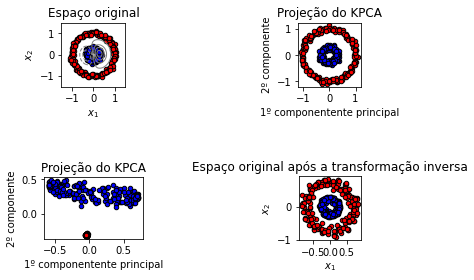

In [22]:
# Plotando o modelo
plt.figure()
plt.subplot(3, 3, 1, aspect="equal")
plt.title("Espaço original")
reds = y == 0
blues = y == 1
plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50),
np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)

# Projeção do primeiro componente principal 


plt.contour(X1, X2, Z_grid, colors="grey", linewidths=1, origin="lower")
plt.subplot(3, 3, 3, aspect="equal")
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue", s=20, edgecolor='k')
plt.title("Projeção do KPCA")
plt.xlabel("1º componentente principal")
plt.ylabel("2º componente")



plt.subplot(3, 3, 7, aspect="equal")
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
plt.title("Projeção do KPCA")
plt.xlabel("1º componentente principal")
plt.ylabel("2º componente")



plt.subplot(3, 3, 9, aspect="equal")
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue", s=20, edgecolor='k')
plt.title("Espaço original após a transformação inversa")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


